In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load in the data
df_temp = pd.read_csv('hungarian.data.txt',header=None)

In [3]:
# Looks horrible! Better clean it up
df_temp.head(10)

,0
0,1254 0 40 1 1 0 0
1,-9 2 140 0 289 -9 -9 -9
2,0 -9 -9 0 12 16 84 0
3,0 0 0 0 150 18 -9 7
4,172 86 200 110 140 86 0 0
5,0 -9 26 20 -9 -9 -9 -9
6,-9 -9 -9 -9 -9 -9 -9 12
7,20 84 0 -9 -9 -9 -9 -9
8,-9 -9 -9 -9 -9 1 1 1
9,1 1 -9. -9. name


In [4]:
# Reshape the dataframe
numRows = 293
numCols = 76
patient = np.array([])
df = pd.DataFrame(data=[],index=pd.RangeIndex(1,numRows),columns=pd.RangeIndex(0,numCols))
for ind,row in df_temp.iterrows():
    
    # Parse row
    row = row.str.split(' ')
    
    if ind > 0 and ind % 10 == 0:
        df.loc[ind/10,:] = patient
        patient = np.array([])
    
    patient = np.concatenate((patient,*row.values))

In [5]:
# Much better
df.head()

,0,1,2,3,4,5,6,7,8,9,...,66,67,68,69,70,71,72,73,74,75
1,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
4,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
5,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [6]:
# Next we'll label the columns to make them more meaningful using a dict.
# I'm going to import the info from the heart-disease.names.txt file.
ids = pd.read_csv('heart-disease.names.txt',sep='\n')

In [7]:
ids.head()

,Publication Request:
0,>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>...
1,This file describes the contents of the hea...
2,This directory contains 4 databases concern...
3,All attributes are numeric-valued. The dat...
4,four following locations:


In [8]:
# We only care about lines 105–213
ids = ids.iloc[105:214]

In [9]:
ids

,Publication Request:
105,1 id: patient identification number
106,2 ccf: social security number (I replace...
107,3 age: age in years
108,4 sex: sex (1 = male; 0 = female)
109,5 painloc: chest pain location (1 = subs...
110,6 painexer (1 = provoked by exertion; 0 ...
111,7 relrest (1 = relieved after rest; 0 = ...
112,"8 pncaden (sum of 5, 6, and 7)"
113,9 cp: chest pain type
114,-- Value 1: typical angina


In [10]:
# Now we want to cut out the lines that don't start with consecutively increasing numbers.
# Feeling unimaginative, so using a for loop it is.

import re

ind = 0
good_rows = []
for row in ids.iterrows():
    
    pattern = r'\s\s+\d+'
    match = re.search(pattern,str(row[1].values))
    
    if match and int(match.group()) == ind + 1:
        good_rows.append(True)
        ind = ind + 1
    else:
        good_rows.append(False)

In [11]:
# Looking good
ids = ids[good_rows]
ids

,Publication Request:
105,1 id: patient identification number
106,2 ccf: social security number (I replace...
107,3 age: age in years
108,4 sex: sex (1 = male; 0 = female)
109,5 painloc: chest pain location (1 = subs...
110,6 painexer (1 = provoked by exertion; 0 ...
111,7 relrest (1 = relieved after rest; 0 = ...
112,"8 pncaden (sum of 5, 6, and 7)"
113,9 cp: chest pain type
118,10 trestbps: resting blood pressure (in m...


In [12]:
# Reindex and rename column
ids.index = pd.RangeIndex(1,ids.shape[0]+1)
ids.columns = ['Measure']

In [13]:
ids.head()

,Measure
1,1 id: patient identification number
2,2 ccf: social security number (I replace...
3,3 age: age in years
4,4 sex: sex (1 = male; 0 = female)
5,5 painloc: chest pain location (1 = subs...


In [14]:
# Now we grab the names of the measures
measure_names = []
for row in ids.iterrows():
    
    pattern = r'\s\s+\d+\s([0-9a-z]+)'
    match = re.search(pattern,str(row[1].values))

    measure_names.append(match.group(1))
    
measure_names = pd.Series(measure_names)

In [15]:
measure_names.head()

0         id
1        ccf
2        age
3        sex
4    painloc
dtype: object

In [16]:
# Now assign measure names to dataframe
df.columns = measure_names.values

In [17]:
df.head()

,id,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
1,1254,0,40,1,1,0,0,-9,2,140,...,-9,-9,1,1,1,1,1,-9.,-9.,name
2,1255,0,49,0,1,0,0,-9,3,160,...,-9,-9,1,1,1,1,1,-9.,-9.,name
3,1256,0,37,1,1,0,0,-9,2,130,...,-9,-9,1,1,1,1,1,-9.,-9.,name
4,1257,0,48,0,1,1,1,-9,4,138,...,2,-9,1,1,1,1,1,-9.,-9.,name
5,1258,0,54,1,1,0,1,-9,3,150,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [18]:
# Reindex dataframe using id
df = df.set_index(df['id'])
df = df.drop('id',axis=1)

In [19]:
df.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk,name
id,,,,,,,,,,,,,,,,,,,,,
1254,0,40,1,1,0,0,-9,2,140,0,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1255,0,49,0,1,0,0,-9,3,160,1,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1256,0,37,1,1,0,0,-9,2,130,0,...,-9,-9,1,1,1,1,1,-9.,-9.,name
1257,0,48,0,1,1,1,-9,4,138,0,...,2,-9,1,1,1,1,1,-9.,-9.,name
1258,0,54,1,1,0,1,-9,3,150,0,...,1,-9,1,1,1,1,1,-9.,-9.,name


In [20]:
# We can go ahead and drop the last row
df = df.iloc[:,0:74]

In [21]:
df.head()
df['num']

id
1254    0
1255    1
1256    0
1257    3
1258    0
1259    0
1260    0
1261    0
1262    1
1263    0
1264    0
1265    3
1266    0
1267    3
1268    0
1269    0
1270    1
1271    0
1272    1
1273    1
1274    0
1275    0
1276    0
1277    3
1278    0
1279    0
1280    0
1281    0
1282    0
1283    0
       ..
1026    2
1027    3
1028    1
1029    0
1030    3
1031    0
1032    2
1033    0
1034    0
1035    0
1036    1
1037    0
1038    0
1039    0
1041    3
1042    2
1043    0
1044    0
1045    0
1046    4
1047    0
1048    0
1049    0
1050    0
1051    0
1052    0
1053    0
1054    0
5001    0
5000    0
Name: num, Length: 293, dtype: object

In [22]:
# Convert missing values (-9, -9.) to NaN
df = df.replace(['-9', '-9.'],[np.nan,np.nan])

In [23]:
df.head()

,ccf,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,...,om2,rcaprox,rcadist,lvx1,lvx2,lvx3,lvx4,lvf,cathef,junk
id,,,,,,,,,,,,,,,,,,,,,
1254,0,40,1,1,0,0,NaN,2,140,0,...,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN
1255,0,49,0,1,0,0,NaN,3,160,1,...,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN
1256,0,37,1,1,0,0,NaN,2,130,0,...,NaN,NaN,NaN,1,1,1,1,1,NaN,NaN
1257,0,48,0,1,1,1,NaN,4,138,0,...,NaN,2,NaN,1,1,1,1,1,NaN,NaN
1258,0,54,1,1,0,1,NaN,3,150,0,...,NaN,1,NaN,1,1,1,1,1,NaN,NaN


In [24]:
# Get rid of columns that we don't want from the description
# ccf, dummy, restckm, exerckm, thalsev, thalpul, earlobe, lvx1, lvx2, lvx3, lvx4, lvf, cathef, junk
df.drop(['ccf', 'dummy', 'restckm', 'exerckm', 'thalsev', 'thalpul', 'earlobe', 'lvx1', 'lvx2', 'lvx3', 'lvx4', 'lvf', 'cathef', 'junk'],axis=1,inplace=True)

In [25]:
df.head()

,age,sex,painloc,painexer,relrest,pncaden,cp,trestbps,htn,chol,...,lmt,ladprox,laddist,diag,cxmain,ramus,om1,om2,rcaprox,rcadist
id,,,,,,,,,,,,,,,,,,,,,
1254,40,1,1,0,0,NaN,2,140,0,289,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1255,49,0,1,0,0,NaN,3,160,1,180,...,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1256,37,1,1,0,0,NaN,2,130,0,283,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1257,48,0,1,1,1,NaN,4,138,0,214,...,NaN,2,NaN,NaN,2,NaN,NaN,NaN,2,NaN
1258,54,1,1,0,1,NaN,3,150,0,NaN,...,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,1,NaN


In [26]:
# Lots of columns with mostly null data :( Remove those with over half NaNs
df.isnull().sum()

age           0
sex           0
painloc       0
painexer      0
relrest       0
pncaden     293
cp            0
trestbps      1
htn           1
chol         23
smoke       281
cigs        292
years       293
fbs           8
dm          272
famhist     292
restecg       1
ekgmo         0
ekgday        0
ekgyr         0
dig           1
prop          2
nitr          1
pro           1
diuretic      1
proto         9
thaldur       2
thaltime    189
met           2
thalach       1
thalrest      1
tpeakbps      1
tpeakbpd      1
trestbpd      1
exang         1
xhypo         2
oldpeak       0
slope       189
rldv5         1
rldv5e        0
ca          289
restef      293
restwm      290
exeref      293
exerwm      291
thal        265
cmo           0
cday          0
cyr           0
num           0
lmt         274
ladprox     235
laddist     245
diag        275
cxmain      234
ramus       284
om1         270
om2         288
rcaprox     244
rcadist     269
dtype: int64

In [27]:
df = df.loc[:,df.isnull().sum() < df.shape[0]/2]

In [28]:
df.head()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,fbs,...,trestbpd,exang,xhypo,oldpeak,rldv5,rldv5e,cmo,cday,cyr,num
id,,,,,,,,,,,,,,,,,,,,,
1254,40,1,1,0,0,2,140,0,289,0,...,86,0,0,0,26,20,12,20,84,0
1255,49,0,1,0,0,3,160,1,180,0,...,90,0,0,1,14,13,11,20,84,1
1256,37,1,1,0,0,2,130,0,283,0,...,80,0,0,0,17,14,11,26,84,0
1257,48,0,1,1,1,4,138,0,214,0,...,86,1,0,1.5,19,22,9,30,84,3
1258,54,1,1,0,1,3,150,0,NaN,0,...,90,0,1,0,13,9,7,30,84,0


In [29]:
# Finally, drop rows with NaNs
df = df.dropna(axis=0)

In [30]:
df.head()

,age,sex,painloc,painexer,relrest,cp,trestbps,htn,chol,fbs,...,trestbpd,exang,xhypo,oldpeak,rldv5,rldv5e,cmo,cday,cyr,num
id,,,,,,,,,,,,,,,,,,,,,
1254,40,1,1,0,0,2,140,0,289,0,...,86,0,0,0,26,20,12,20,84,0
1256,37,1,1,0,0,2,130,0,283,0,...,80,0,0,0,17,14,11,26,84,0
1257,48,0,1,1,1,4,138,0,214,0,...,86,1,0,1.5,19,22,9,30,84,3
1259,39,1,1,0,1,3,120,0,339,0,...,80,0,0,0,20,21,4,22,84,0
1260,45,0,0,1,0,2,130,0,237,0,...,84,0,0,0,11,11,12,4,84,0


In [31]:
# Now we are left with 244 patients and 36 measures
df.shape

(244, 36)

In [32]:
# Convert everything to numpy floats
df = df.astype(np.float)

In [33]:
# For preliminary analysis, only pull out the 14 attributes that have been used so far
df2 = df.loc[:,['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal','num']]

In [34]:
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
id,,,,,,,,,,,,,,
1254,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,NaN,NaN,NaN,0.0
1256,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,NaN,NaN,NaN,0.0
1257,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,NaN,NaN,NaN,3.0
1259,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0
1260,45.0,0.0,2.0,130.0,237.0,0.0,0.0,170.0,0.0,0.0,NaN,NaN,NaN,0.0


In [35]:
# Hmm, slope, ca and thal were part of the NaN columns we removed earlier. Let's leave those out.

In [36]:
df2 = df.loc[:,['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','num']]
df2.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
id,,,,,,,,,,,
1254,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,0.0
1256,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,0.0
1257,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,3.0
1259,39.0,1.0,3.0,120.0,339.0,0.0,0.0,170.0,0.0,0.0,0.0
1260,45.0,0.0,2.0,130.0,237.0,0.0,0.0,170.0,0.0,0.0,0.0


In [37]:
# Now we can finally take a look at it!
df2.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,47.397541,0.729508,3.020492,132.270492,246.254098,0.069672,0.229508,139.196721,0.323770,0.626230,0.819672
std,7.897085,0.445127,0.983187,17.270797,62.840259,0.255117,0.476387,23.917258,0.468875,0.944885,1.250622
min,28.000000,0.000000,1.000000,92.000000,85.000000,0.000000,0.000000,82.000000,0.000000,0.000000,0.000000
25%,41.750000,0.000000,2.000000,120.000000,207.000000,0.000000,0.000000,120.750000,0.000000,0.000000,0.000000
50%,48.000000,1.000000,3.000000,130.000000,239.000000,0.000000,0.000000,140.000000,0.000000,0.000000,0.000000
75%,54.000000,1.000000,4.000000,140.000000,276.250000,0.000000,0.000000,155.000000,1.000000,1.000000,1.000000
max,65.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,190.000000,1.000000,5.000000,4.000000


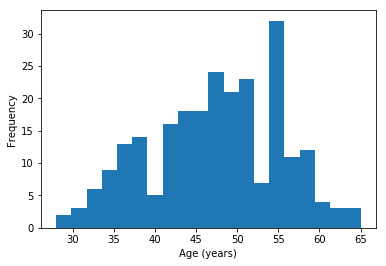

In [38]:
# Age
plt.hist(df2['age'],bins=20)
plt.xlabel('Age (years)')
plt.ylabel('Frequency')

In [43]:
# Outcome variable 'num' needs to be recoded: currently 1–4, needs to be 1 or 0
df2['num'] = df2['num'].replace([1.0, 2.0, 3.0, 4.0],[1.0, 1.0, 1.0, 1.0])

In [49]:
# 37.7% of outcomes have some heart disease
df2['num'].sum()/df2['num'].count()

0.37704918032786883

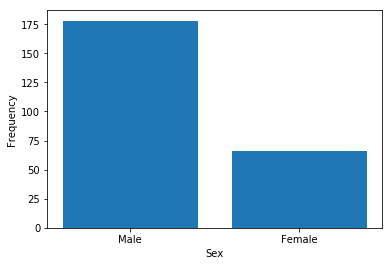

In [56]:
# Sex: 1 = male, 0 = female. Over twice as many men (178) than women (66).
plt.bar([0,1],[df2['sex'].sum(),len(df2['sex'])-df2['sex'].sum()])
plt.xticks([0,1], ('Male', 'Female'))
plt.xlabel('Sex')
plt.ylabel('Frequency')

In [40]:
ids

,Measure
1,1 id: patient identification number
2,2 ccf: social security number (I replace...
3,3 age: age in years
4,4 sex: sex (1 = male; 0 = female)
5,5 painloc: chest pain location (1 = subs...
6,6 painexer (1 = provoked by exertion; 0 ...
7,7 relrest (1 = relieved after rest; 0 = ...
8,"8 pncaden (sum of 5, 6, and 7)"
9,9 cp: chest pain type
10,10 trestbps: resting blood pressure (in m...
